In [16]:
# imporing required librabries 
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
batch_size=32
num_classes=10
epochs=20

In [3]:
# Loading CIFAR data which have 10 different categories of images
# Categoires are 'airplane','automobile','bird','cat','deer','dog','frog','horse','ship' and 'truck'

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print("Training data shape ",x_train.shape)
print("Number of Training data ",x_train.shape[0])
print("Number of Test data shape ",x_test.shape[0])

Training data shape  (50000, 32, 32, 3)
Number of Training data  50000
Number of Test data shape  10000


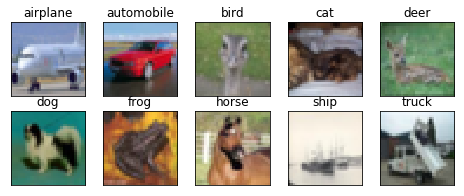

In [4]:
class_names= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

fig=plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax=fig.add_subplot(2,5,1+i,xticks=[],yticks=[])
    idx=np.where(y_train[:]==i)[0]
    features_idx=x_train[idx,:,:]
    img_num=np.random.randint(features_idx.shape[0])
    im=(features_idx[img_num,:])
    ax.set_title(class_names[i])
    plt.imshow(im)
    
plt.show()


In [5]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)


In [6]:
# Model 1
# created a simple model with Conv2D ,Maxpooling and Dense layers
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 64)        0         
__________

In [8]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# normalizing the data
x_train /= 255
x_test /= 255

In [9]:
y_test.shape

(10000, 10)

In [10]:
def compile_and_fit_model():
    model.compile(loss="categorical_crossentropy",optimizer='sgd',metrics=['accuracy'])
    model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True)

In [11]:
compile_and_fit_model()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 18s 364us/step - loss: 1.9613 - acc: 0.2879 - val_loss: 1.6556 - val_acc: 0.4127
Epoch 2/20
50000/50000 [==============================] - 14s 285us/step - loss: 1.5640 - acc: 0.4385 - val_loss: 1.4572 - val_acc: 0.4702
Epoch 3/20
50000/50000 [==============================] - 14s 285us/step - loss: 1.4008 - acc: 0.4981 - val_loss: 1.4224 - val_acc: 0.4983
Epoch 4/20
50000/50000 [==============================] - 14s 285us/step - loss: 1.2788 - acc: 0.5460 - val_loss: 1.3576 - val_acc: 0.5291
Epoch 5/20
50000/50000 [==============================] - 14s 285us/step - loss: 1.1797 - acc: 0.5810 - val_loss: 1.2352 - val_acc: 0.5636
Epoch 6/20
50000/50000 [==============================] - 14s 284us/step - loss: 1.0937 - acc: 0.6128 - val_loss: 1.1574 - val_acc: 0.5983
Epoch 7/20
50000/50000 [==============================] - 14s 282us/step - loss: 1.0220 - acc: 0.6413 - val_loss: 1.

## Finding in Model 1
In Above model training and test loss decreasing gradually but the training accuracy is much greater then the validaiotn accuracy that means model is overfit.


In [13]:
# Model 2
# Adding dropouts after maxpooling layer
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [14]:
compile_and_fit_model()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 16s 312us/step - loss: 2.0876 - acc: 0.2260 - val_loss: 1.8345 - val_acc: 0.3478
Epoch 2/20
50000/50000 [==============================] - 15s 302us/step - loss: 1.7455 - acc: 0.3620 - val_loss: 1.6069 - val_acc: 0.4168
Epoch 3/20
50000/50000 [==============================] - 15s 302us/step - loss: 1.5831 - acc: 0.4222 - val_loss: 1.4510 - val_acc: 0.4718
Epoch 4/20
50000/50000 [==============================] - 15s 301us/step - loss: 1.4621 - acc: 0.4682 - val_loss: 1.3579 - val_acc: 0.5056
Epoch 5/20
50000/50000 [==============================] - 15s 302us/step - loss: 1.3699 - acc: 0.5065 - val_loss: 1.2715 - val_acc: 0.5505
Epoch 6/20
50000/50000 [==============================] - 15s 301us/step - loss: 1.2960 - acc: 0.5347 - val_loss: 1.1974 - val_acc: 0.5777
Epoch 7/20
50000/50000 [==============================] - 15s 301us/step - loss: 1.2344 - acc: 0.5572 - val_loss: 1.

## Finding in Model 2
Training and test loss decreasing gradually. Training accuracy is less as compare the Model 1 but here traiing and testing accuracy is almost similar. So here dropout is working as a hyperparameter to overcome overfitting in model.

In [20]:
# Model 3
# after doing batch normalization layer after activation function

model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

compile_and_fit_model()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 20s 400us/step - loss: 1.3694 - acc: 0.5133 - val_loss: 1.1484 - val_acc: 0.5855
Epoch 2/20
50000/50000 [==============================] - 19s 378us/step - loss: 0.9659 - acc: 0.6588 - val_loss: 0.9365 - val_acc: 0.6708
Epoch 3/20
50000/50000 [==============================] - 19s 377us/step - loss: 0.7858 - acc: 0.7250 - val_loss: 0.9262 - val_acc: 0.6779
Epoch 4/20
50000/50000 [==============================] - 19s 377us/step - loss: 0.6704 - acc: 0.7653 - val_loss: 0.9036 - val_acc: 0.6915
Epoch 5/20
50000/50000 [==============================] - 19s 384us/step - loss: 0.5779 - acc: 0.7985 - val_loss: 0.7971 - val_acc: 0.7228
Epoch 6/20
50000/50000 [==============================] - 19s 376us/step - loss: 0.5017 - acc: 0.8253 - val_loss: 0.8457 - val_acc: 0.7266
Epoch 7/20
50000/50000 [==============================] - 19s 383us/step - loss: 0.4290 - acc: 0.8504 - val_loss: 0.

## Finding in Model 3 
Here loss in training and validation decreasing gradually. Here in thhis model we get the highest accuracy from above models but here the model is also overfit. Batch normalization increases the accuracy but it overfit the model

In [21]:
# Model 5
# Here I change the filter size from (3,3) to (2,2) for first block

model=Sequential()

model.add(Conv2D(32,(2,2),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

compile_and_fit_model()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 16s 324us/step - loss: 1.4682 - acc: 0.4739 - val_loss: 1.3481 - val_acc: 0.5122
Epoch 2/20
50000/50000 [==============================] - 15s 304us/step - loss: 1.0787 - acc: 0.6199 - val_loss: 1.1339 - val_acc: 0.6029
Epoch 3/20
50000/50000 [==============================] - 15s 303us/step - loss: 0.9093 - acc: 0.6815 - val_loss: 1.4630 - val_acc: 0.5404
Epoch 4/20
50000/50000 [==============================] - 15s 303us/step - loss: 0.7960 - acc: 0.7206 - val_loss: 0.9529 - val_acc: 0.6694
Epoch 5/20
50000/50000 [==============================] - 15s 303us/step - loss: 0.7067 - acc: 0.7537 - val_loss: 0.9468 - val_acc: 0.6764
Epoch 6/20
50000/50000 [==============================] - 15s 303us/step - loss: 0.6324 - acc: 0.7786 - val_loss: 0.9144 - val_acc: 0.6985
Epoch 7/20
50000/50000 [==============================] - 15s 303us/step - loss: 0.5651 - acc: 0.8033 - val_loss: 0.

## Finding for Model 4
Here losses are decreasing gradually. And model gained good accuracy in training data but here overfiting is happening 

In [22]:
# Model 5
#In this model I used batch normalization , dropouts and diferent size of filter

model=Sequential()

model.add(Conv2D(32,(2,2),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(2,2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(2,2),padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Activation("relu"))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

compile_and_fit_model()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 20s 406us/step - loss: 1.8213 - acc: 0.3360 - val_loss: 1.6574 - val_acc: 0.4119
Epoch 2/20
50000/50000 [==============================] - 19s 375us/step - loss: 1.4955 - acc: 0.4556 - val_loss: 1.5906 - val_acc: 0.4668
Epoch 3/20
50000/50000 [==============================] - 19s 377us/step - loss: 1.3499 - acc: 0.5102 - val_loss: 1.1261 - val_acc: 0.5947
Epoch 4/20
50000/50000 [==============================] - 19s 377us/step - loss: 1.2459 - acc: 0.5525 - val_loss: 1.0649 - val_acc: 0.6183
Epoch 5/20
50000/50000 [==============================] - 19s 376us/step - loss: 1.1654 - acc: 0.5836 - val_loss: 0.9806 - val_acc: 0.6501
Epoch 6/20
50000/50000 [==============================] - 19s 376us/step - loss: 1.1043 - acc: 0.6080 - val_loss: 0.8935 - val_acc: 0.6829
Epoch 7/20
50000/50000 [==============================] - 19s 377us/step - loss: 1.0564 - acc: 0.6276 - val_loss: 0.

## Finding in Model 5
HEre i combine the above four model like batch normalization , dropouts , different size of filter. And here we are able to overcome from overfitting with didn't get the gud accuracy

In [23]:
# Model 6
# Along with using batch normalization , drop outs and different size of kernel , i just increases the number of parameters
# by increase the no of filters like 32 is replaced by 64 , 64 replaced by 128 and 128 replaced by 512

model=Sequential()

model.add(Conv2D(64,(2,2),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(2,2),padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Activation("relu"))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

compile_and_fit_model()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 34s 675us/step - loss: 1.6491 - acc: 0.4163 - val_loss: 1.4315 - val_acc: 0.4937
Epoch 2/20
50000/50000 [==============================] - 32s 641us/step - loss: 1.2622 - acc: 0.5479 - val_loss: 1.0945 - val_acc: 0.6146
Epoch 3/20
50000/50000 [==============================] - 32s 640us/step - loss: 1.0914 - acc: 0.6133 - val_loss: 0.9896 - val_acc: 0.6519
Epoch 4/20
50000/50000 [==============================] - 32s 644us/step - loss: 0.9800 - acc: 0.6528 - val_loss: 1.0628 - val_acc: 0.6478
Epoch 5/20
50000/50000 [==============================] - 32s 642us/step - loss: 0.9066 - acc: 0.6801 - val_loss: 0.8380 - val_acc: 0.7112
Epoch 6/20
50000/50000 [==============================] - 32s 639us/step - loss: 0.8423 - acc: 0.7040 - val_loss: 0.8183 - val_acc: 0.7208
Epoch 7/20
50000/50000 [==============================] - 32s 639us/step - loss: 0.7857 - acc: 0.7234 - val_loss: 0.

## Finding in Model 6
In this model the accuracy is pretty gud and the model is not overfitted ,So conclustion is by increases no of parameters with batch normalization , drop outs and different size of kernel we can the good model